<a href="https://colab.research.google.com/github/jdospina/viscomp202502/blob/main/notebooks/07_morphology_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔄 Transformación Proyectiva con Coordenadas Homogéneas

Este notebook demuestra visualmente cómo funcionan las transformaciones proyectivas usando coordenadas homogéneas en el procesamiento de imágenes.

## 📚 Conceptos clave:
- **Coordenadas homogéneas**: Representación de puntos 2D como (x, y, w)
- **Matriz de homografía**: Transformación 3x3 que mapea puntos entre planos
- **Factor de escala w**: Permite efectos de perspectiva

---

In [1]:
# 📦 Instalación e importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.widgets import Slider
import ipywidgets as widgets
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib para mejor visualización
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Librerías importadas correctamente")
print("📋 Versiones:")
print(f"   NumPy: {np.__version__}")
print(f"   Matplotlib: {plt.matplotlib.__version__}")

✅ Librerías importadas correctamente
📋 Versiones:
   NumPy: 2.0.2
   Matplotlib: 3.10.0


## 🧮 Funciones para Transformaciones Proyectivas

In [2]:
class TransformacionProyectiva:
    """Clase para manejar transformaciones proyectivas con coordenadas homogéneas"""

    def __init__(self):
        # Matriz de homografía identidad (sin transformación)
        self.H = np.array([
            [1.0, 0.0, 0.0],
            [0.0, 1.0, 0.0],
            [0.0, 0.0, 1.0]
        ])

        # Cuadrilátero original (simulando un documento)
        self.puntos_originales = np.array([
            [1, 1],    # superior izquierda
            [4, 1.2],  # superior derecha
            [4.2, 3],  # inferior derecha
            [0.8, 2.8] # inferior izquierda
        ])

    def actualizar_matriz(self, h11=1, h12=0, h13=0, h21=0, h22=1, h23=0, h31=0, h32=0):
        """Actualiza la matriz de homografía con nuevos parámetros"""
        self.H = np.array([
            [h11, h12, h13],
            [h21, h22, h23],
            [h31, h32, 1.0]
        ])

    def aplicar_transformacion(self, puntos):
        """Aplica la transformación homográfica a un conjunto de puntos"""
        # Convertir a coordenadas homogéneas
        puntos_homogeneos = np.column_stack([puntos, np.ones(len(puntos))])

        # Aplicar transformación
        puntos_transformados = (self.H @ puntos_homogeneos.T).T

        # Normalizar (dividir por w)
        w = puntos_transformados[:, 2:3]
        puntos_cartesianos = puntos_transformados[:, :2] / w

        return puntos_cartesianos, w.flatten()

    def mostrar_matriz(self):
        """Muestra la matriz de homografía actual de forma legible"""
        print("📊 Matriz de Homografía H:")
        print("┌                           ┐")
        for i, fila in enumerate(self.H):
            if i == 1:
                print(f"│ {fila[0]:7.3f} {fila[1]:7.3f} {fila[2]:7.1f} │")
            else:
                print(f"│ {fila[0]:7.3f} {fila[1]:7.3f} {fila[2]:7.1f} │")
        print("└                           ┘")

        # Interpretación de parámetros
        print("\n🔍 Interpretación:")
        print(f"   • Escalado X: {self.H[0,0]:.3f}")
        print(f"   • Escalado Y: {self.H[1,1]:.3f}")
        print(f"   • Traslación X: {self.H[0,2]:.1f}")
        print(f"   • Traslación Y: {self.H[1,2]:.1f}")
        print(f"   • Perspectiva X: {self.H[2,0]:.4f}")
        print(f"   • Perspectiva Y: {self.H[2,1]:.4f}")

# Crear instancia de la clase
transformador = TransformacionProyectiva()
transformador.mostrar_matriz()

📊 Matriz de Homografía H:
┌                           ┐
│   1.000   0.000     0.0 │
│   0.000   1.000     0.0 │
│   0.000   0.000     1.0 │
└                           ┘

🔍 Interpretación:
   • Escalado X: 1.000
   • Escalado Y: 1.000
   • Traslación X: 0.0
   • Traslación Y: 0.0
   • Perspectiva X: 0.0000
   • Perspectiva Y: 0.0000


## 🎨 Función de Visualización

In [3]:
def visualizar_transformacion(h11=1, h12=0, h13=0, h21=0, h22=1, h23=0, h31=0, h32=0, puntos_extra=None):
    """Visualiza la transformación proyectiva con parámetros interactivos"""

    # Actualizar matriz
    transformador.actualizar_matriz(h11, h12, h13, h21, h22, h23, h31, h32)

    # Crear figura con subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('🔄 Transformación Proyectiva - Coordenadas Homogéneas', fontsize=16, fontweight='bold')

    # === PANEL IZQUIERDO: ORIGINAL ===
    ax1.set_title('📐 Imagen Original', fontsize=14, fontweight='bold', color='#2E86AB')

    # Dibujar grid de referencia
    for i in range(-1, 7):
        ax1.axhline(y=i, color='lightgray', linestyle='-', alpha=0.3, linewidth=0.5)
        ax1.axvline(x=i, color='lightgray', linestyle='-', alpha=0.3, linewidth=0.5)

    # Cuadrilátero original
    poly_original = Polygon(transformador.puntos_originales,
                           facecolor='#2E86AB', alpha=0.3,
                           edgecolor='#2E86AB', linewidth=3)
    ax1.add_patch(poly_original)

    # Vértices del cuadrilátero original
    for i, punto in enumerate(transformador.puntos_originales):
        ax1.plot(punto[0], punto[1], 'o', color='#2E86AB', markersize=8)
        ax1.annotate(f'P{i+1}', (punto[0], punto[1]),
                    xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')

    # Puntos extra si los hay
    if puntos_extra is not None:
        for i, punto in enumerate(puntos_extra):
            ax1.plot(punto[0], punto[1], 's', color='#E63946', markersize=6)
            ax1.annotate(f'T{i+1}', (punto[0], punto[1]),
                        xytext=(5, 5), textcoords='offset points', fontsize=9, color='#E63946')

    ax1.set_xlim(-1, 6)
    ax1.set_ylim(-1, 5)
    ax1.set_aspect('equal')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')

    # === PANEL DERECHO: TRANSFORMADO ===
    ax2.set_title('🎯 Imagen Transformada', fontsize=14, fontweight='bold', color='#A23B72')

    try:
        # Transformar cuadrilátero
        puntos_transformados, factores_w = transformador.aplicar_transformacion(transformador.puntos_originales)

        # Determinar límites dinámicos
        x_min, x_max = puntos_transformados[:, 0].min() - 1, puntos_transformados[:, 0].max() + 1
        y_min, y_max = puntos_transformados[:, 1].min() - 1, puntos_transformados[:, 1].max() + 1

        # Dibujar grid de referencia
        grid_x = np.arange(np.floor(x_min), np.ceil(x_max) + 1)
        grid_y = np.arange(np.floor(y_min), np.ceil(y_max) + 1)

        for x in grid_x:
            ax2.axvline(x=x, color='lightgray', linestyle='-', alpha=0.3, linewidth=0.5)
        for y in grid_y:
            ax2.axhline(y=y, color='lightgray', linestyle='-', alpha=0.3, linewidth=0.5)

        # Cuadrilátero transformado
        poly_transformado = Polygon(puntos_transformados,
                                   facecolor='#A23B72', alpha=0.3,
                                   edgecolor='#A23B72', linewidth=3)
        ax2.add_patch(poly_transformado)

        # Vértices del cuadrilátero transformado con factor w
        for i, (punto, w) in enumerate(zip(puntos_transformados, factores_w)):
            ax2.plot(punto[0], punto[1], 'o', color='#A23B72', markersize=8)
            ax2.annotate(f'P{i+1}\n(w={w:.3f})', (punto[0], punto[1]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=9, fontweight='bold', ha='left')

        # Puntos extra transformados
        if puntos_extra is not None:
            puntos_extra_trans, w_extra = transformador.aplicar_transformacion(puntos_extra)
            for i, (punto, w) in enumerate(zip(puntos_extra_trans, w_extra)):
                ax2.plot(punto[0], punto[1], 's', color='#E63946', markersize=6)
                ax2.annotate(f'T{i+1}\n(w={w:.3f})', (punto[0], punto[1]),
                            xytext=(5, 5), textcoords='offset points',
                            fontsize=8, color='#E63946')

        ax2.set_xlim(x_min, x_max)
        ax2.set_ylim(y_min, y_max)

    except np.linalg.LinAlgError:
        ax2.text(0.5, 0.5, '⚠️ Matriz singular\n(no invertible)',
                transform=ax2.transAxes, ha='center', va='center',
                fontsize=14, color='red', fontweight='bold')
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(-1, 1)

    ax2.set_aspect('equal')
    ax2.grid(True, alpha=0.3)
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')

    plt.tight_layout()
    plt.show()

    # Mostrar matriz actual
    transformador.mostrar_matriz()

print("✅ Función de visualización definida")

✅ Función de visualización definida


## 🎮 Controles Interactivos

Usa los controles deslizantes para modificar los parámetros de la matriz de homografía y observar cómo cambia la transformación en tiempo real.

In [4]:
# Crear controles interactivos con ipywidgets
controles = widgets.interactive(
    visualizar_transformacion,
    h11=widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1,
                           description='Escalado X (h₁₁):', style={'description_width': 'initial'}),
    h12=widgets.FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.05,
                           description='Inclinación XY (h₁₂):', style={'description_width': 'initial'}),
    h13=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1,
                           description='Traslación X (h₁₃):', style={'description_width': 'initial'}),
    h21=widgets.FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.05,
                           description='Inclinación YX (h₂₁):', style={'description_width': 'initial'}),
    h22=widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1,
                           description='Escalado Y (h₂₂):', style={'description_width': 'initial'}),
    h23=widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1,
                           description='Traslación Y (h₂₃):', style={'description_width': 'initial'}),
    h31=widgets.FloatSlider(value=0.0, min=-0.3, max=0.3, step=0.01,
                           description='Perspectiva X (h₃₁):', style={'description_width': 'initial'}),
    h32=widgets.FloatSlider(value=0.0, min=-0.3, max=0.3, step=0.01,
                           description='Perspectiva Y (h₃₂):', style={'description_width': 'initial'}),
    puntos_extra=widgets.fixed(None)
)

# Mostrar controles
display(controles)

interactive(children=(FloatSlider(value=1.0, description='Escalado X (h₁₁):', max=2.0, min=0.1, style=SliderSt…

## 🧪 Experimentos Predefinidos

Ejecuta las siguientes celdas para ver transformaciones específicas con explicaciones.

### 🔄 Ejemplo 1: Rotación Simple

🔄 ROTACIÓN DE 30 GRADOS
cos(30°) = 0.866
sin(30°) = 0.500

Matriz de rotación:
[ 0.866  -0.500  0]
[ 0.500    0.866  0]
[   0.000     0.000  1]


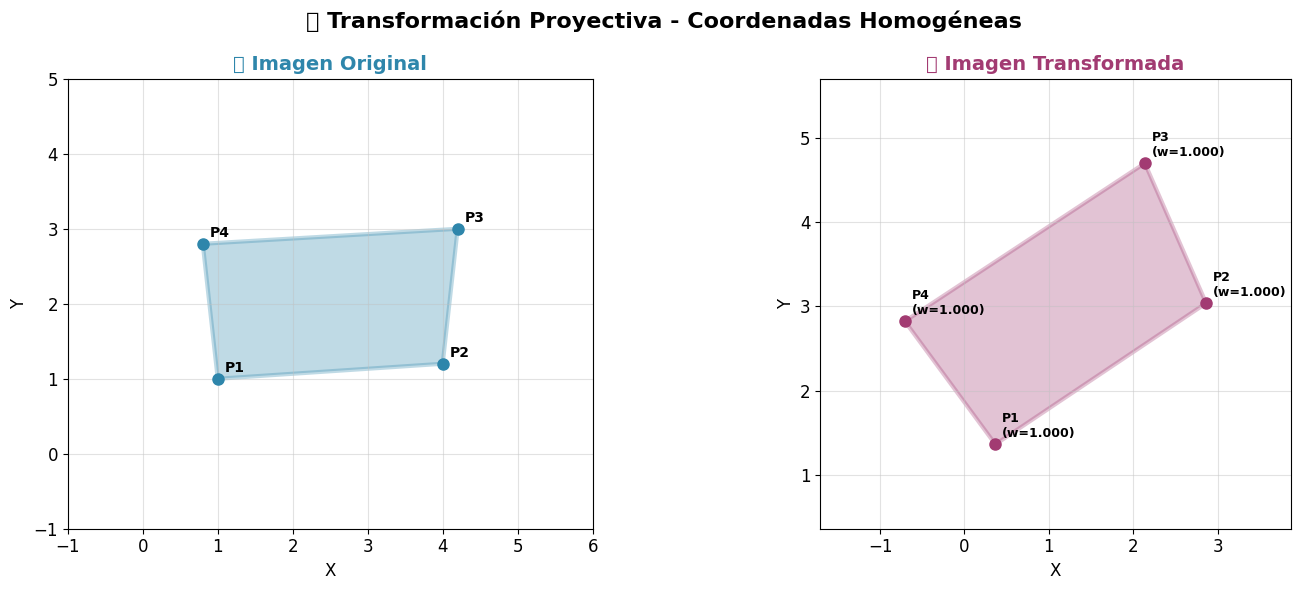

📊 Matriz de Homografía H:
┌                           ┐
│   0.866  -0.500     0.0 │
│   0.500   0.866     0.0 │
│   0.000   0.000     1.0 │
└                           ┘

🔍 Interpretación:
   • Escalado X: 0.866
   • Escalado Y: 0.866
   • Traslación X: 0.0
   • Traslación Y: 0.0
   • Perspectiva X: 0.0000
   • Perspectiva Y: 0.0000


In [5]:
# Rotación de aproximadamente 30 grados
import math

angulo = math.pi / 6  # 30 grados en radianes
cos_theta = math.cos(angulo)
sin_theta = math.sin(angulo)

print("🔄 ROTACIÓN DE 30 GRADOS")
print("=" * 40)
print(f"cos(30°) = {cos_theta:.3f}")
print(f"sin(30°) = {sin_theta:.3f}")
print("\nMatriz de rotación:")
print(f"[{cos_theta:6.3f}  {-sin_theta:6.3f}  0]")
print(f"[{sin_theta:6.3f}   {cos_theta:6.3f}  0]")
print(f"[   0.000     0.000  1]")

visualizar_transformacion(
    h11=cos_theta, h12=-sin_theta, h13=0,
    h21=sin_theta, h22=cos_theta, h23=0,
    h31=0, h32=0
)

### 📏 Ejemplo 2: Escalado No Uniforme

📏 ESCALADO NO UNIFORME
• Escalado X: 1.5 (150%)
• Escalado Y: 0.7 (70%)

Esto estira la imagen horizontalmente y la comprime verticalmente.


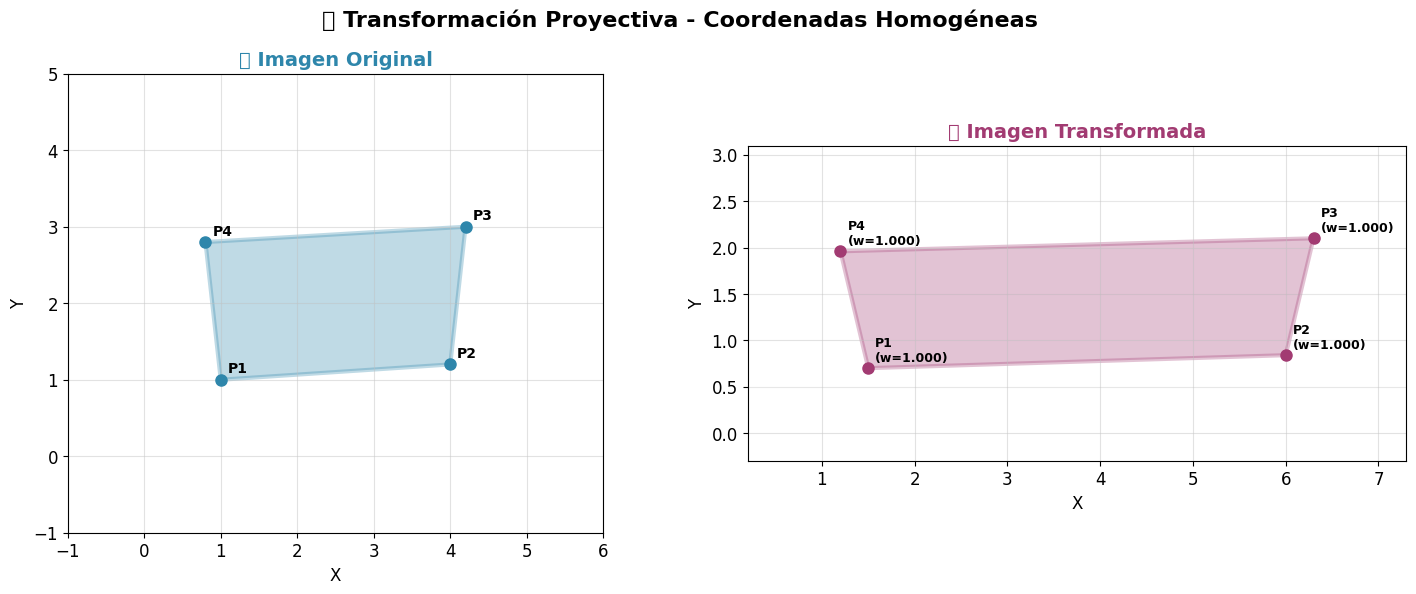

📊 Matriz de Homografía H:
┌                           ┐
│   1.500   0.000     0.0 │
│   0.000   0.700     0.0 │
│   0.000   0.000     1.0 │
└                           ┘

🔍 Interpretación:
   • Escalado X: 1.500
   • Escalado Y: 0.700
   • Traslación X: 0.0
   • Traslación Y: 0.0
   • Perspectiva X: 0.0000
   • Perspectiva Y: 0.0000


In [6]:
print("📏 ESCALADO NO UNIFORME")
print("=" * 40)
print("• Escalado X: 1.5 (150%)")
print("• Escalado Y: 0.7 (70%)")
print("\nEsto estira la imagen horizontalmente y la comprime verticalmente.")

visualizar_transformacion(
    h11=1.5, h12=0, h13=0,
    h21=0, h22=0.7, h23=0,
    h31=0, h32=0
)

### 🎭 Ejemplo 3: Transformación de Cizallamiento (Shear)

🎭 CIZALLAMIENTO (SHEAR)
• Cizallamiento horizontal: h₁₂ = 0.3
• Cizallamiento vertical: h₂₁ = 0.2

Esto inclina la imagen sin cambiar el área.


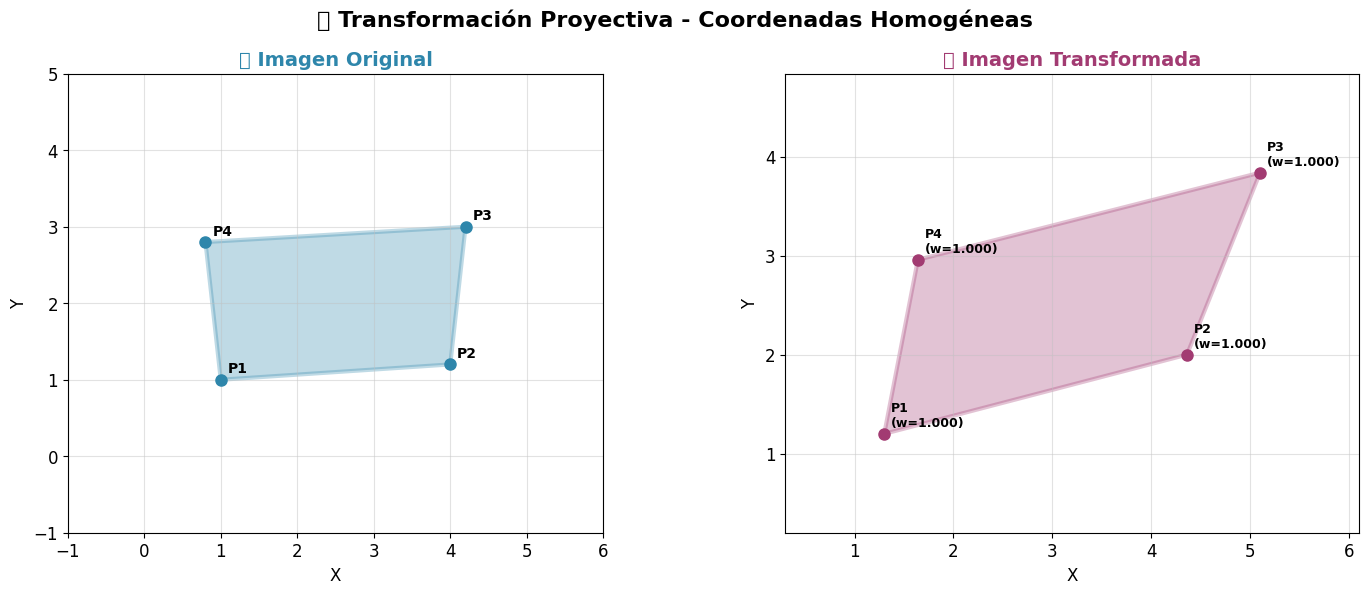

📊 Matriz de Homografía H:
┌                           ┐
│   1.000   0.300     0.0 │
│   0.200   1.000     0.0 │
│   0.000   0.000     1.0 │
└                           ┘

🔍 Interpretación:
   • Escalado X: 1.000
   • Escalado Y: 1.000
   • Traslación X: 0.0
   • Traslación Y: 0.0
   • Perspectiva X: 0.0000
   • Perspectiva Y: 0.0000


In [7]:
print("🎭 CIZALLAMIENTO (SHEAR)")
print("=" * 40)
print("• Cizallamiento horizontal: h₁₂ = 0.3")
print("• Cizallamiento vertical: h₂₁ = 0.2")
print("\nEsto inclina la imagen sin cambiar el área.")

visualizar_transformacion(
    h11=1, h12=0.3, h13=0,
    h21=0.2, h22=1, h23=0,
    h31=0, h32=0
)

### 🎯 Ejemplo 4: Efecto de Perspectiva

🎯 TRANSFORMACIÓN PERSPECTIVA
• Perspectiva X: h₃₁ = 0.1
• Perspectiva Y: h₃₂ = 0.05

⚠️  IMPORTANTE: Observa cómo varían los factores 'w'
Los valores de 'w' diferentes de 1 crean el efecto de perspectiva.

Esto simula ver el objeto desde un ángulo (como una fotografía).


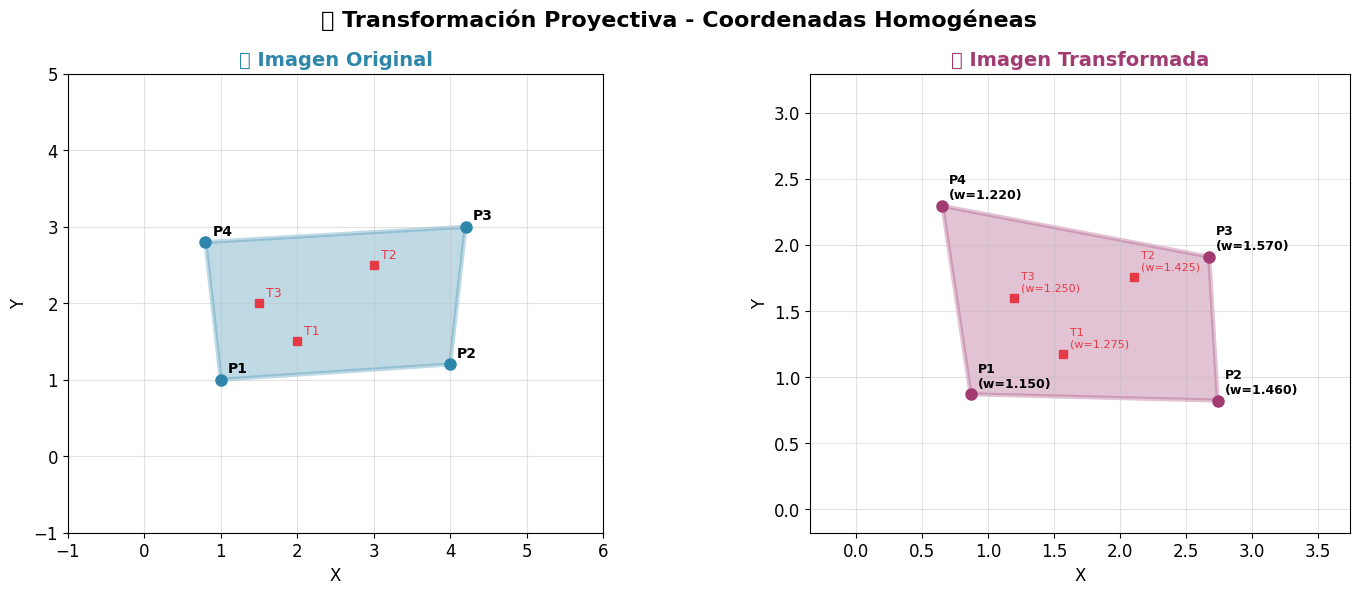

📊 Matriz de Homografía H:
┌                           ┐
│   1.000   0.000     0.0 │
│   0.000   1.000     0.0 │
│   0.100   0.050     1.0 │
└                           ┘

🔍 Interpretación:
   • Escalado X: 1.000
   • Escalado Y: 1.000
   • Traslación X: 0.0
   • Traslación Y: 0.0
   • Perspectiva X: 0.1000
   • Perspectiva Y: 0.0500


In [8]:
print("🎯 TRANSFORMACIÓN PERSPECTIVA")
print("=" * 40)
print("• Perspectiva X: h₃₁ = 0.1")
print("• Perspectiva Y: h₃₂ = 0.05")
print("\n⚠️  IMPORTANTE: Observa cómo varían los factores 'w'")
print("Los valores de 'w' diferentes de 1 crean el efecto de perspectiva.")
print("\nEsto simula ver el objeto desde un ángulo (como una fotografía).")

# Agregar algunos puntos de prueba
puntos_test = np.array([[2, 1.5], [3, 2.5], [1.5, 2]])

visualizar_transformacion(
    h11=1, h12=0, h13=0,
    h21=0, h22=1, h23=0,
    h31=0.1, h32=0.05,
    puntos_extra=puntos_test
)

### 🔧 Ejemplo 5: Corrección de Documento Fotografiado

🔧 CORRECCIÓN DE DOCUMENTO
Simulación de corrección de perspectiva de un documento
fotografiado en ángulo (como un escáner de smartphone).

Combina escalado, traslación y perspectiva para 'enderezar'
un documento que se ve distorsionado en la fotografía.


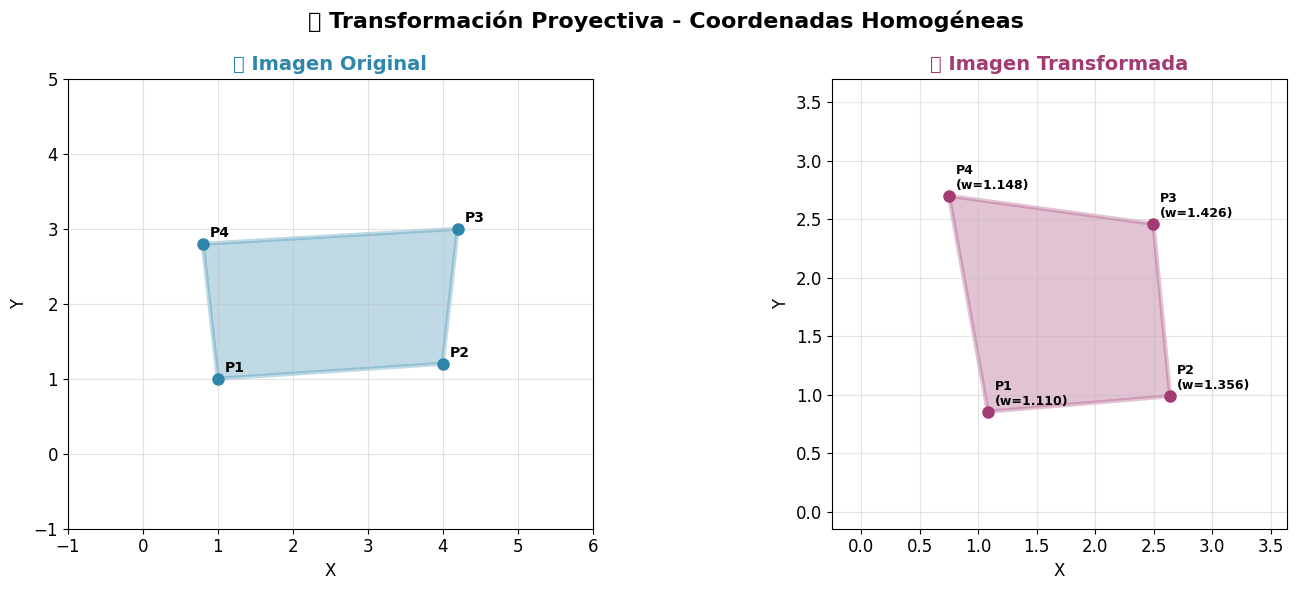

📊 Matriz de Homografía H:
┌                           ┐
│   0.800  -0.100     0.5 │
│   0.050   1.200    -0.3 │
│   0.080   0.030     1.0 │
└                           ┘

🔍 Interpretación:
   • Escalado X: 0.800
   • Escalado Y: 1.200
   • Traslación X: 0.5
   • Traslación Y: -0.3
   • Perspectiva X: 0.0800
   • Perspectiva Y: 0.0300


In [9]:
print("🔧 CORRECCIÓN DE DOCUMENTO")
print("=" * 40)
print("Simulación de corrección de perspectiva de un documento")
print("fotografiado en ángulo (como un escáner de smartphone).")
print("\nCombina escalado, traslación y perspectiva para 'enderezar'")
print("un documento que se ve distorsionado en la fotografía.")

visualizar_transformacion(
    h11=0.8, h12=-0.1, h13=0.5,
    h21=0.05, h22=1.2, h23=-0.3,
    h31=0.08, h32=0.03
)

## 📊 Análisis Numérico Detallado

Vamos a examinar paso a paso cómo se calcula la transformación de un punto específico.

In [10]:
def analisis_punto_detallado(punto_x, punto_y, H):
    """Análisis detallado de la transformación de un punto"""

    print("🔍 ANÁLISIS DETALLADO DE TRANSFORMACIÓN")
    print("=" * 50)
    print(f"📍 Punto original: ({punto_x}, {punto_y})")
    print("\n1️⃣ Conversión a coordenadas homogéneas:")
    punto_homo = np.array([punto_x, punto_y, 1])
    print(f"   [{punto_x}, {punto_y}, 1]")

    print("\n2️⃣ Matriz de homografía H:")
    print("   ┌                           ┐")
    for fila in H:
        print(f"   │ {fila[0]:7.3f} {fila[1]:7.3f} {fila[2]:7.3f} │")
    print("   └                           ┘")

    print("\n3️⃣ Multiplicación matricial H × [x, y, 1]ᵀ:")
    resultado_homo = H @ punto_homo
    x_primo, y_primo, w = resultado_homo

    print(f"   x' = {H[0,0]:.3f}×{punto_x} + {H[0,1]:.3f}×{punto_y} + {H[0,2]:.3f}×1 = {x_primo:.3f}")
    print(f"   y' = {H[1,0]:.3f}×{punto_x} + {H[1,1]:.3f}×{punto_y} + {H[1,2]:.3f}×1 = {y_primo:.3f}")
    print(f"   w  = {H[2,0]:.3f}×{punto_x} + {H[2,1]:.3f}×{punto_y} + {H[2,2]:.3f}×1 = {w:.6f}")

    print(f"\n   Resultado homogéneo: [{x_primo:.3f}, {y_primo:.3f}, {w:.6f}]")

    print("\n4️⃣ Normalización (división por w):")
    x_final = x_primo / w
    y_final = y_primo / w

    print(f"   x_final = {x_primo:.3f} ÷ {w:.6f} = {x_final:.3f}")
    print(f"   y_final = {y_primo:.3f} ÷ {w:.6f} = {y_final:.3f}")

    print("\n🎯 RESULTADO FINAL:")
    print(f"   Punto transformado: ({x_final:.3f}, {y_final:.3f})")
    print(f"   Factor de escala w: {w:.6f}")

    if abs(w - 1.0) > 0.001:
        print(f"\n💡 INTERPRETACIÓN:")
        if w > 1:
            print(f"   w > 1 ({w:.3f}): El punto está 'más lejos' en la perspectiva")
            print(f"   Las coordenadas se comprimen por el factor {1/w:.3f}")
        else:
            print(f"   w < 1 ({w:.3f}): El punto está 'más cerca' en la perspectiva")
            print(f"   Las coordenadas se expanden por el factor {1/w:.3f}")
    else:
        print(f"\n💡 w ≈ 1: No hay efecto de perspectiva (transformación afín)")

    return x_final, y_final, w

# Ejemplo de análisis detallado
print("Definiendo matriz de ejemplo con efecto de perspectiva...")
H_ejemplo = np.array([
    [0.9, -0.1, 0.5],
    [0.05, 1.1, -0.2],
    [0.08, 0.02, 1.0]
])

analisis_punto_detallado(2.5, 2.0, H_ejemplo)

Definiendo matriz de ejemplo con efecto de perspectiva...
🔍 ANÁLISIS DETALLADO DE TRANSFORMACIÓN
📍 Punto original: (2.5, 2.0)

1️⃣ Conversión a coordenadas homogéneas:
   [2.5, 2.0, 1]

2️⃣ Matriz de homografía H:
   ┌                           ┐
   │   0.900  -0.100   0.500 │
   │   0.050   1.100  -0.200 │
   │   0.080   0.020   1.000 │
   └                           ┘

3️⃣ Multiplicación matricial H × [x, y, 1]ᵀ:
   x' = 0.900×2.5 + -0.100×2.0 + 0.500×1 = 2.550
   y' = 0.050×2.5 + 1.100×2.0 + -0.200×1 = 2.125
   w  = 0.080×2.5 + 0.020×2.0 + 1.000×1 = 1.240000

   Resultado homogéneo: [2.550, 2.125, 1.240000]

4️⃣ Normalización (división por w):
   x_final = 2.550 ÷ 1.240000 = 2.056
   y_final = 2.125 ÷ 1.240000 = 1.714

🎯 RESULTADO FINAL:
   Punto transformado: (2.056, 1.714)
   Factor de escala w: 1.240000

💡 INTERPRETACIÓN:
   w > 1 (1.240): El punto está 'más lejos' en la perspectiva
   Las coordenadas se comprimen por el factor 0.806


(np.float64(2.0564516129032255),
 np.float64(1.7137096774193548),
 np.float64(1.24))

## 🎓 Resumen y Conceptos Clave

### 📝 Puntos importantes a recordar:

In [11]:
def mostrar_resumen():
    """Muestra un resumen de los conceptos clave"""

    print("🎓 RESUMEN DE CONCEPTOS CLAVE")
    print("=" * 50)

    conceptos = {
        "📐 Coordenadas Homogéneas": [
            "• Representan puntos 2D como (x, y, w)",
            "• Punto cartesiano = (x/w, y/w)",
            "• Permiten unificar todas las transformaciones como multiplicaciones matriciales"
        ],
        "🎯 Matriz de Homografía": [
            "• Matriz 3×3 con 8 grados de libertad",
            "• Mapea cualquier cuadrilátero a otro cuadrilátero",
            "• Combina transformaciones afines y proyectivas"
        ],
        "⚖️ Factor de Escala w": [
            "• w = 1: Sin efecto de perspectiva (transformación afín)",
            "• w ≠ 1: Efecto de perspectiva (objetos 'cerca' vs 'lejos')",
            "• Varía según la posición del punto en la imagen"
        ],
        "🔄 Tipos de Transformación": [
            "• Euclidiana: preserva distancias y ángulos",
            "• Afín: preserva paralelismo y proporciones",
            "• Proyectiva: la más general, permite efectos de perspectiva"
        ],
        "🚀 Aplicaciones Prácticas": [
            "• Corrección de documentos escaneados",
            "• Realidad aumentada y calibración de cámaras",
            "• Creación de panoramas y mosaicos",
            "• Registro de imágenes médicas",
            "• Rectificación estéreo en visión 3D"
        ]
    }

    for titulo, puntos in conceptos.items():
        print(f"{titulo}")
        for punto in puntos:
            print(f"   {punto}")
        print()

    print("💡 FÓRMULA FUNDAMENTAL:")
    print("┌─────────────────────────────────┐")
    print("│  [x']   [h₁₁ h₁₂ h₁₃] [x]      │")
    print("│  [y'] = [h₂₁ h₂₂ h₂₃] [y]      │")
    print("│  [w ]   [h₃₁ h₃₂  1 ] [1]      │")
    print("│                                 │")
    print("│  Punto final = (x'/w, y'/w)     │")
    print("└─────────────────────────────────┘")

    print("\n🎯 PRÓXIMOS PASOS:")
    print("• Experimenta con diferentes valores en los controles interactivos")
    print("• Prueba combinaciones de transformaciones")
    print("• Observa cómo cambia el factor 'w' con la perspectiva")
    print("• Aplica estos conceptos en proyectos de visión por computadora")

mostrar_resumen()

🎓 RESUMEN DE CONCEPTOS CLAVE
📐 Coordenadas Homogéneas
   • Representan puntos 2D como (x, y, w)
   • Punto cartesiano = (x/w, y/w)
   • Permiten unificar todas las transformaciones como multiplicaciones matriciales

🎯 Matriz de Homografía
   • Matriz 3×3 con 8 grados de libertad
   • Mapea cualquier cuadrilátero a otro cuadrilátero
   • Combina transformaciones afines y proyectivas

⚖️ Factor de Escala w
   • w = 1: Sin efecto de perspectiva (transformación afín)
   • w ≠ 1: Efecto de perspectiva (objetos 'cerca' vs 'lejos')
   • Varía según la posición del punto en la imagen

🔄 Tipos de Transformación
   • Euclidiana: preserva distancias y ángulos
   • Afín: preserva paralelismo y proporciones
   • Proyectiva: la más general, permite efectos de perspectiva

🚀 Aplicaciones Prácticas
   • Corrección de documentos escaneados
   • Realidad aumentada y calibración de cámaras
   • Creación de panoramas y mosaicos
   • Registro de imágenes médicas
   • Rectificación estéreo en visión 3D

💡 F

---

## 🎉 ¡Felicitaciones!

Has completado una exploración interactiva de las **transformaciones proyectivas** usando **coordenadas homogéneas**. Este es un concepto fundamental en:

- 🖥️ **Visión por computadora**
- 🎮 **Gráficos por computadora**
- 📱 **Procesamiento de imágenes**
- 🥽 **Realidad aumentada**
- 🤖 **Robótica y navegación**

### 📚 Para seguir aprendiendo:

1. **Experimenta** con los controles interactivos
2. **Modifica** el código para crear tus propios experimentos
3. **Aplica** estos conceptos en proyectos reales
4. **Explora** librerías como OpenCV que implementan estas transformaciones

¡El mundo de la geometría computacional te espera! 🚀